[0 0 0]


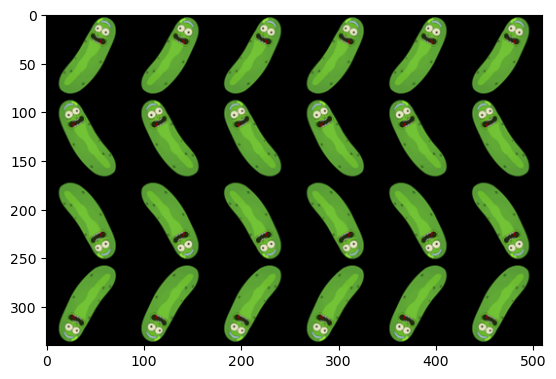

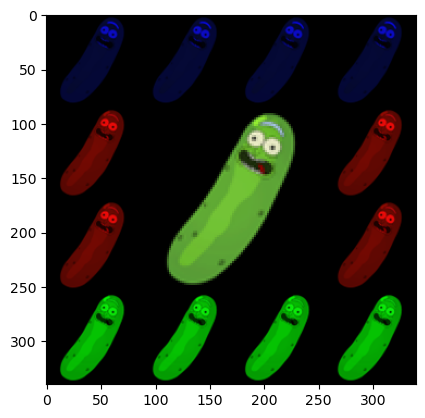

In [1]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os

from numpy.ma.extras import vstack

loc_input_img = os.path.join('image_raw.png')
i = Image.open(loc_input_img)
np_image = np.array(i)
np_image_resize = np_image[12:97, 22:107]

print(np_image_resize[0, 0, 0:3])

"""
def Change_colorvalue(colorvalue, factor):
    return int(colorvalue*factor)

Change_colorvalue_vectorized = np.vectorize(Change_colorvalue)
"""

def Change_color_image(image, color):
    #gaat de alle kleurkanalen behalve die van parameter color met een bepaalde factor verminderen
    # bv. color='r' -> kanalen blauw en groen worden met 95% verminderd
    new_image=image.copy()
    #maak een dictionary die voor elke kleur aangeeft welke kanalen moeten verminderd worden met een bepaalde factor
    channeldict={'r':(1,2), 'g':(0,2), 'b':(0,1)}
    
    for i in channeldict[color] :
        new_image[0:,0:, i]=new_image[0:,0:, i]*0.05
   
    return new_image
"""    
def Change_color_image4(image, color):
    #gaat de alle kleurkanalen behalve die van parameter color met een bepaalde factor verminderen
    # bv. color='r' -> kanalen blauw en groen worden met 95% verminderd
    new_image=image.copy()
    
    if color=='r':
        a=1,2
    if color=='g':
        a=0,2
    if color=='b':
        a=0,1
    for i in a:
        new_image[0:,0:, i]=new_image[0:,0:, i]*0.05
   
    return new_image

def Change_color_image3(image, color):
    #gaat de alle kleurkanalen behalve die van parameter color met een bepaalde factor verminderen
    # bv. color='r' -> kanalen blauw en groen worden met 95% verminderd
    new_image=image.copy()
    redvalue=image[0:,0:, 0]
    greenvalue=image[0:,0:, 1]
    bluevalue=image[0:,0:, 2]
    if color=='r':
        new_image[0:,0:, 1]= new_image[0:,0:, 1]*0.05
        new_image[0:,0:, 2]=new_image[0:,0:, 2]*0.05
    if color=='g':
        new_image[0:,0:, 0]=new_image[0:,0:, 0]*0.05
        new_image[0:,0:, 2]=new_image[0:,0:, 2]*0.05
    if color=='b':
        new_image[0:,0:, 0]=new_image[0:,0:, 0]*0.05
        new_image[0:,0:, 1]=new_image[0:,0:, 1]*0.05
    return new_image
    
def Change_color_image2(image, color):
    #gaat de alle kleurkanalen behalve die van parameter color met een bepaalde factor verminderen
    # bv. color='r' -> kanalen blauw en groen worden met 95% verminderd
    new_image=image.copy()
    redvalue=image[0:,0:, 0]
    greenvalue=image[0:,0:, 1]
    bluevalue=image[0:,0:, 2]
    if color=='r':
        new_image[0:,0:, 0]=Change_colorvalue_vectorized(redvalue, 1 )
        new_image[0:,0:, 1]=Change_colorvalue_vectorized(greenvalue, 0.05)
        new_image[0:,0:, 2]=Change_colorvalue_vectorized(bluevalue, 0.05)
    if color=='g':
        new_image[0:,0:, 0]=Change_colorvalue_vectorized(redvalue, 0.05 )
        new_image[0:,0:, 1]=Change_colorvalue_vectorized(greenvalue, 1)
        new_image[0:,0:, 2]=Change_colorvalue_vectorized(bluevalue, 0.05)
    if color=='b':
        new_image[0:,0:, 0]=Change_colorvalue_vectorized(redvalue, 0.05 )
        new_image[0:,0:, 1]=Change_colorvalue_vectorized(greenvalue, 0.05)
        new_image[0:,0:, 2]=Change_colorvalue_vectorized(bluevalue, 1)
    return new_image
"""
# creer matrix van images
# ---------------------------
def maak_basis_matrix_met_originele_images(matrix, image):
    # maak een array van dezelfde shape als matrix waarvan de elementen allemaal de originele image bevatten
    nbr_of_rows = matrix.shape[0]
    nbr_of_columns = matrix.shape[1]
    # Maak een lege array met dtype=object
    array = np.full((nbr_of_rows, nbr_of_columns, image.shape[0], image.shape[1], image.shape[2]), 0)

    # Vul de array zodat elk element de originele image bevat
    array[:,:]=image
    return array
    
def flip_left_right(image):
    return image[::, ::-1]


def flip_upside_down(image):
    return image[::-1]

 

def grid_with_flips(image, matrix):
    basis_matrix = maak_basis_matrix_met_originele_images(matrix, image)
    flip_left_right_mask= matrix==1
    flip_upside_down_mask= matrix==2
    flip_both_mask= matrix==3
    #pas de masks toe op de basismatrix
    basis_matrix[flip_left_right_mask]=flip_left_right(image)
    basis_matrix[flip_upside_down_mask]=flip_upside_down(image)
    basis_matrix[flip_both_mask]=flip_left_right(flip_upside_down(image))
    return stack_images(basis_matrix)
    
def stack_images(array_of_images):
    # voegt alle individuele images samen tot 1 image

    # voor elke rij gaan we de images in alle kolommen stacken tot 1 image met als resultaat een array van nbr_of_rows rijen en 1 kolom
    nbr_of_rows = array_of_images.shape[0]
    array = np.empty((nbr_of_rows), dtype=object)
    for rownbr in range(nbr_of_rows):
        array[rownbr] = np.hstack(array_of_images[rownbr])

    # de images van alle rijen (in 1 kolom) worden nu gestacked zodat we slechts 1 image overhouden
    result = np.vstack(array)
    return result

def create_big_image(image):
    all_rows=[]
    #voor elke rij van de image gaan we elke kolom (pixel) verdubbelen in horizontale richting door deze in een list (all_columns_for_row) te steken
    for row in range(image.shape[0]):
        all_columns_for_row=[]
        for column in range(image.shape[1]):
            all_columns_for_row.append(image[row,column])
            all_columns_for_row.append(image[row,column])
        #voeg de nieuwe rij (all_columns_for_row) toe aan de list van alle rijen
        all_rows.append( all_columns_for_row)
    # de lijst all_rows wordt nu gezipped met zichzelf zodat elke rij verdubbeld wordt
    zipped_rows= tuple(zip(all_rows,all_rows))
    # de zipped_rows moeten vervolgens nog verticaal gestacked worden om de finale image te bekomen
    result=np.vstack( zipped_rows  )
    return result
 
def create_colorful_big_one(colors, image):
    #de image wordt opgedeeld in verschillende arrays waarvan we de volgorde van de kleuren vastleggen:
    first_row_colors = colors[0:4]
    right_center_row_colors = colors[4:6]
    third_row_colors = colors[9:5:-1] # voor de onderste rij willen we de kleuren in positie 10, 9, 8, 7, 6 die we daarna horizontaal zullen stacken
    left_center_row_colors = colors[12:9:-1] # voor de linkse kolom willen we de kleuren in positie 12, 11 die we daarna verticaal zullen stacken


    left_center = np.vstack([Change_color_image(image, color) for color in left_center_row_colors])
    big_one = create_big_image(image)
    right_center = np.vstack([Change_color_image(image, color) for color in right_center_row_colors])

    first_row=np.hstack([Change_color_image(image,color ) for color in first_row_colors])
    second_row=np.hstack((left_center,big_one, right_center))
    third_row = np.hstack([Change_color_image(image, color) for color in third_row_colors])

    all_rows=first_row,second_row, third_row
    result=np.vstack(all_rows)
    return result



# definieer de shape van de matrix en welke transformaties er moeten gebeuren op de verschillende images
# geen transformatie = 0
# flip left right = 1
# flip upside down = 2
# flip upside down en left right = 3
matrix = np.array([[0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1], [2, 2, 2, 2, 2, 2], [3, 3, 3, 3, 3, 3]])
plt.imshow(grid_with_flips(np_image_resize, matrix))
plt.show()


colors = ['b', 'b', 'b', 'b', 'r', 'r', 'g', 'g', 'g', 'g', 'r', 'r']
colorful_big_one=create_colorful_big_one(colors, np_image_resize)
plt.imshow(colorful_big_one)
plt.show()


